# IMPORTACION DE LIBRERIAS Y LECTURA DE DATOS

In [1]:
# para manejar los datasets
import pandas as pd
import numpy as np

# para graficar
import matplotlib.pyplot as plt
import seaborn as sns

# para descripcion de las variables
import funpymodeling as fp

# for the yeo-johnson transformation
import scipy.stats as stats

# para mostrar todas las columnas del dataframe en el notebook
pd.pandas.set_option('display.max_columns', None)



In [2]:
# cargamos el dataset
data = pd.read_csv('../Telco-Customer-Churn.csv',sep=",")

# filas y columnas de los datos
print(data.shape)

# visualizamos
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Analisis

El analisis seguira la siguiente ruta:

1. La variable Taget

2. Tipos de variables (categoricas y numericas)

3. Valores faltantes

4. Variables Numericas

    - Discretas
    - Continuas
    - Distribuciones
    - Transformaciones
    
    
5. Variables Categoricas

    - Carinalidad
    - Etiquetas Raras
    - Graficos especiales

# Target

In [3]:
df=data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Verificamos como es la target

print(data.groupby("Churn")["Churn"].count())

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64


**Resumen de caracteristicas**

Desplegamos un primer resumen para verificar caracteristicas. Utilizamos la libreria funpymodeling

In [6]:
# Guardamos el resumen en df_eda..

df_eda=fp.status(df)
df_eda

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,customerID,0,0.0,0,0.000000,7043,object
1,gender,0,0.0,0,0.000000,2,object
2,SeniorCitizen,0,0.0,5901,0.837853,2,int64
3,Partner,0,0.0,0,0.000000,2,object
4,Dependents,0,0.0,0,0.000000,2,object
5,tenure,0,0.0,11,0.001562,73,int64
6,PhoneService,0,0.0,0,0.000000,2,object
7,MultipleLines,0,0.0,0,0.000000,3,object
8,InternetService,0,0.0,0,0.000000,3,object
9,OnlineSecurity,0,0.0,0,0.000000,3,object


# Tipos de Variables

A continuacion, vamos identificar las variables categoricas y las numericas

In [7]:
ls_num=["int64","float64"]
var_num=df_eda.loc[df_eda["type"].apply(lambda x: x in(ls_num))][["variable","type"]]
var_num

,variable,type
2,SeniorCitizen,int64
5,tenure,int64
18,MonthlyCharges,float64


Vamos a recodificar la variables a tipo categoricas, salvo MonthlyCharges, TotalCharges, Tenure y Churn. El caso de esta ultima, sera a int64 ya que es la identificada con target que queremos predecir y seria conveniente dejarla como numerica cuantitativa.

In [8]:
ls_num=["customerID","tenure","MonthlyCharges","TotalCharges","Churn"]
ls_cat=df.columns
ls_cat=ls_cat.drop(ls_num)
ls_cat

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Recodificamos todas las variables alojadas en ls_cat en categoricas

In [9]:
for col in ls_cat:
    df[col]=df[col].astype("category")

df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges          object
Churn                 object
dtype: object

Reconvertimos TotalCharges a tipo numerico (float64), y borramos la variables temporales dff y dfft

In [10]:
# Remplazamos "coma" por "punto" para luego transformar a numerico

dff=df
dff=pd.DataFrame(df["TotalCharges"].str.replace(pat=",",repl="."))
dff=pd.DataFrame(pd.to_numeric(dff["TotalCharges"],errors="coerce"))

dfft=df.drop(columns=["TotalCharges"])
dfft["TotalCharges"]=dff["TotalCharges"]
df=dfft
del dfft,dff
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No,1990.50
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No,7362.90
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes,306.60


Hacemos los mismo con la variable Churn, solo que esta la reconvertimos a int64

Deberiamos recodificar la variable para que tome valores 0 y 1. Luego de ello reconvertiremos la variable para que sea de tipo categorica

In [11]:
def verifica(val):
    if val=="No":
        return 0
    elif val=="Yes":
        return 1
        
df["Churn"]=df["Churn"].map(verifica)
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [12]:
df_eda=fp.status(df)
df_eda

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,customerID,0,0.000000,0,0.000000,7043,object
1,gender,0,0.000000,0,0.000000,2,category
2,SeniorCitizen,0,0.000000,5901,0.837853,2,category
3,Partner,0,0.000000,0,0.000000,2,category
4,Dependents,0,0.000000,0,0.000000,2,category
5,tenure,0,0.000000,11,0.001562,73,int64
6,PhoneService,0,0.000000,0,0.000000,2,category
7,MultipleLines,0,0.000000,0,0.000000,3,category
8,InternetService,0,0.000000,0,0.000000,3,category
9,OnlineSecurity,0,0.000000,0,0.000000,3,category


In [13]:
ls_obj=["object"]
var_obj=df_eda.loc[df_eda["type"].apply(lambda x: x in(ls_obj))][["variable","type"]]
var_obj

,variable,type
0,customerID,object


# Valores faltantes

Verificamos los valores faltantes

In [14]:
# Hacemos una lista de variabes que contenien valores faltantes
vars_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determinamos el porcentaje de valores faltantes (expresados como decimal en tanto por uno)
# y desplegamos por porcentaje ordenados de mayor a menor

df[vars_na].isnull().mean().sort_values(ascending=False)

TotalCharges    0.001562
dtype: float64

In [15]:
# Identificamos tipos de variables con datos faltantes

cat_na = [var for var in ls_cat if var in vars_na]
num_na = [var for var in ls_num if var in vars_na]

print('Numero de variables categoricas con na: ', len(cat_na))
print('Numero de variables numericas con na: ', len(num_na))

Numero de variables categoricas con na:  0
Numero de variables numericas con na:  1


In [16]:
num_na

['TotalCharges']

## Relacion entre los datos faltantes y Churn


Evaluemos el valor de Churn en aquellas observaciones donde falta la información. Haremos esto para cada variable que muestre datos faltantes.

In [17]:
def analyse_na_value(df, var):

    # Hacemos una copia del dataset para evitar sobreescribir el que ya tenemos
    df = df.copy()

    # Identificamos con 1 en donde existan nulos
    df[var] = np.where(df[var].isnull(), 1, 0)

    tmp = df.groupby(var)['Churn'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Churn", color='green')

    plt.show()

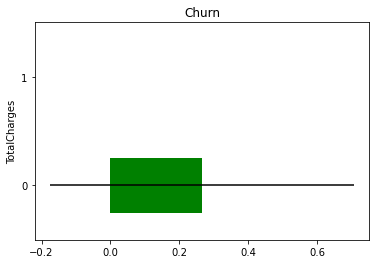

In [18]:
# corremos la funcion..
for var in vars_na:
    analyse_na_value(df, var)

Los datos faltantes, corresponden a clientes activos.

## Variables Numericas

Averigüemos qué variables numéricas tenemos en el conjunto de datos.

Analizamos las variables continuas. Sospechamos de una posible relacion entre MonthlyCharges y TotalCharges. Verficamos y graficamos..

In [19]:
import numpy as np
(print("Promedio de cargas mensuales de los nulos en TotalCharges: ", 
       np.round(df.loc[df["TotalCharges"].isna()]["MonthlyCharges"].agg("mean"),2)))

(print("La antiguedad de estos casos en promedio es: ", 
      df.loc[df["TotalCharges"].isna()]["tenure"].agg("mean")))

Promedio de cargas mensuales de los nulos en TotalCharges:  41.42
La antiguedad de estos casos en promedio es:  0.0


Se observa que la antiguedad es nula. Es decir, son clientes nuevos sin historial. No llegan al 1% de los datos, con lo cual obviarlos es indistinto

Imputamos los NaN en TotalCharges por la media.

In [20]:
df["TotalCharges"].fillna(value=41.42,inplace=True)

# Variables Temporales

El presente caso no incluye variables de tipo temporal.

# Variables Discretas Numericas

Analizaremos las variables discretas, es decir, variables con un numero finito de posibles valores..

In [21]:
#  let's male a list of discrete variables
discrete_vars_num = [var for var in ls_num if len(
    df[var].unique()) < 20]


print('Number of discrete variables: ', len(discrete_vars_num))

Number of discrete variables:  1


In [22]:
df[discrete_vars_num].head()

,Churn
0,0
1,0
2,1
3,0
4,1


La unica variable numerica discreta en este caso coincide con la target Churn

Analizamos el comportamiento de la target Churn con respecto a distintas variables categoricas ya alojadas en ls_cat

In [23]:
# Generamos tablas cruzadas de todas las variables categoricas vs Churn

for cat in ls_cat:
    for d_c in discrete_vars_num:
        print("--------------------\n")
        print(pd.crosstab(df[d_c],df[cat]),"\n\n")

--------------------

gender  Female  Male
Churn               
0         2549  2625
1          939   930 


--------------------

SeniorCitizen     0    1
Churn                   
0              4508  666
1              1393  476 


--------------------

Partner    No   Yes
Churn              
0        2441  2733
1        1200   669 


--------------------

Dependents    No   Yes
Churn                 
0           3390  1784
1           1543   326 


--------------------

PhoneService   No   Yes
Churn                  
0             512  4662
1             170  1699 


--------------------

MultipleLines    No  No phone service   Yes
Churn                                      
0              2541               512  2121
1               849               170   850 


--------------------

InternetService   DSL  Fiber optic    No
Churn                                   
0                1962         1799  1413
1                 459         1297   113 


--------------------

OnlineSecur

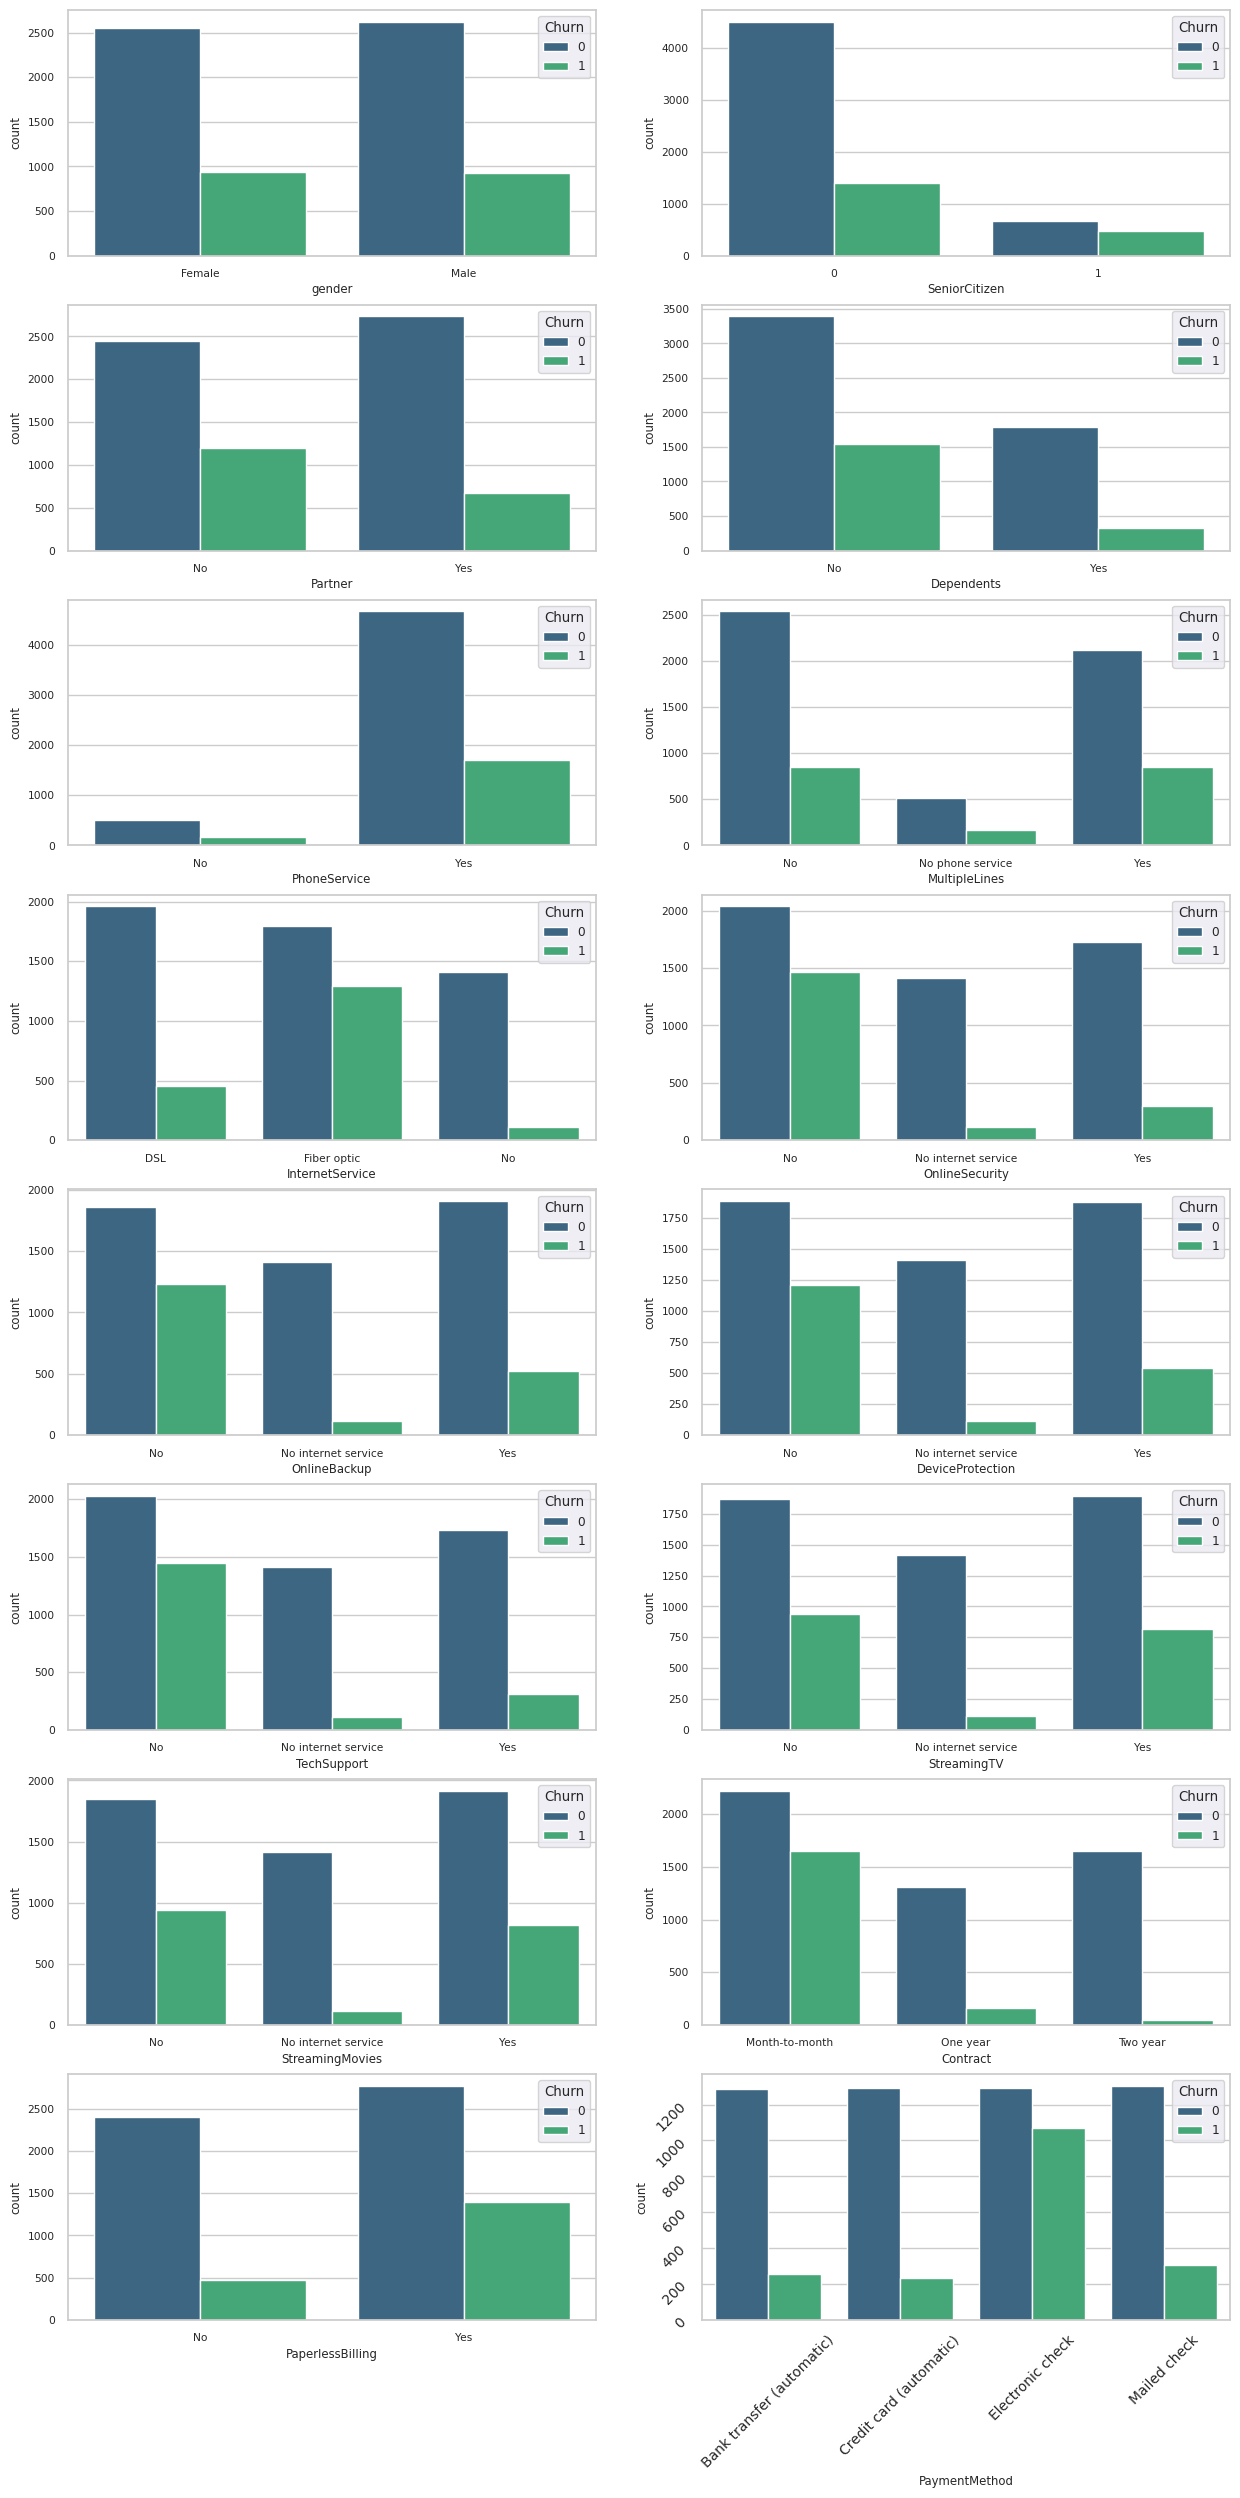

In [24]:
# Graficamos la informacion cruzada arriba obtenida

# Recordemos que las variables numericas categoricas estan alojadas en discrete_vars_num,
# en este caso solo esta churn, pero vamos a adaptar el codigo por si fueran mas variables


sns.reset_defaults()
sns.set(font_scale=0.7, style="whitegrid")
lista=["Churn","TotalCharges"]

n_rows=8
n_cols=2

f, ax=plt.subplots(nrows=n_rows,
                   ncols=n_cols,
                   figsize = (15,30))

i=0

for row in range(0,n_rows,1):
    sns.set(font_scale=0.8)
    plt.tick_params(labelsize=10, labelrotation=45)
    
    for col in range(0,n_cols,1):
        sns.countplot(ax=ax[row,col],data=df, x=ls_cat[i],hue="Churn",palette="viridis")
        i+=1

sns.reset_defaults()

- Chequeamos los tipos de contratos

                       Churn
gender Contract             
Female Month-to-month    842
       One year           75
       Two year           22
Male   Month-to-month    813
       One year           91
       Two year           26 

AxesSubplot(0.125,0.11;0.775x0.77)


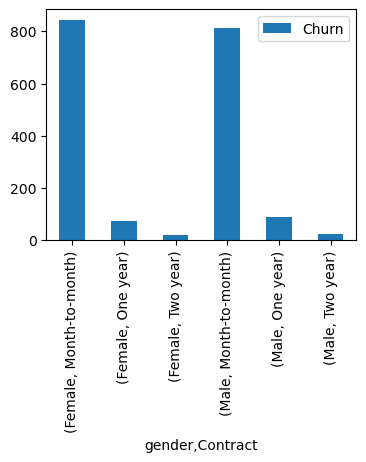

In [25]:
query=df.loc[df["Churn"]==1].groupby(["gender","Contract"])[["Churn"]].agg("count")
print(query,"\n")
print(query.plot.bar(figsize=(4,3)));

El abandono es similar tanto en hombres como en mujeres. Predominando en contratos de mes a mes

# Variables Discretas Categoricas

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,151.65


In [27]:
# Vemos las categorias y el porcentaje de imputacion en cada una

def ver_categorias_frecuentes(df, var, rare_p):
    
    df = df.copy()

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_p]

for var in ls_cat:
    
    # Vemos las categorias mas frecuentes
    frequent_ls = ver_categorias_frecuentes(df, var, 0.01)
    print("-------------------------------")
    print(var, frequent_ls)
    print()

-------------------------------
gender gender
Female    0.495244
Male      0.504756
Name: gender, dtype: float64

-------------------------------
SeniorCitizen SeniorCitizen
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

-------------------------------
Partner Partner
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

-------------------------------
Dependents Dependents
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

-------------------------------
PhoneService PhoneService
No     0.096834
Yes    0.903166
Name: PhoneService, dtype: float64

-------------------------------
MultipleLines MultipleLines
No                  0.481329
No phone service    0.096834
Yes                 0.421837
Name: MultipleLines, dtype: float64

-------------------------------
InternetService InternetService
DSL            0.343746
Fiber optic    0.439585
No             0.216669
Name: InternetService, dtype: float64

-------------------------------
OnlineSecurit



- Hay variables categoricas que estan un poco descompensadas respecto de la cantidad de datos (SeniorCitizen, Dependents, PhoneService, Contract) lo cual a la hora de desplegar el modelo podria generarnos algun sobreajuste de los datos..
- La variable Contract arroja informacion importante, mas de la mitad de los clientes parecen preferir los contratos de mes a mes




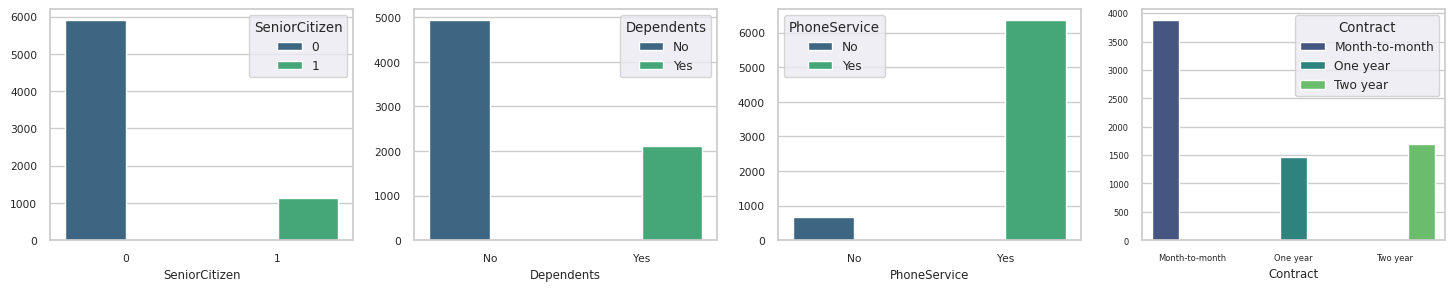

In [28]:
# Vamos a crear una lista de estas variables..

ls_descompensada=["SeniorCitizen", "Dependents", "PhoneService", "Contract"]

sns.reset_defaults()
sns.set(font_scale=0.7, style="whitegrid")
f, ax=plt.subplots(ncols=len(ls_descompensada),nrows=1,figsize = (18,3))

plt.tick_params(labelsize=6)
sns.set(font_scale=0.8)

for row in range(0,len(ls_descompensada),1):
    g=sns.countplot(ax=ax[row],data=df, x=ls_descompensada[row],palette="viridis", hue=ls_descompensada[row])
    g.set(ylabel = '')
    
sns.reset_defaults()

# Variables Continuas

En el presente caso existen solo dos y parecieran estar correlacionadas. Veamos ..

In [29]:
# Hacemos una lista de variables continuas
cont_vars = [
    var for var in ls_num if var not in discrete_vars_num and len(df[var].unique())>100]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  3


In [30]:
df[cont_vars].head()

,customerID,MonthlyCharges,TotalCharges
0,7590-VHVEG,29.85,29.85
1,5575-GNVDE,56.95,1889.50
2,3668-QPYBK,53.85,108.15
3,7795-CFOCW,42.30,1840.75
4,9237-HQITU,70.70,151.65


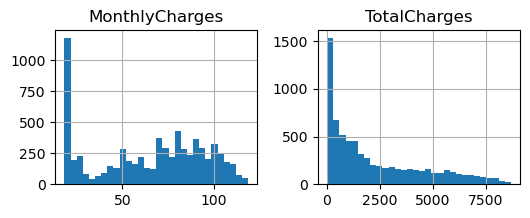

In [31]:
# Realizamos los graficos de cada variable continua

cont_vars =[var for var in cont_vars if var not in ["customerID"] ]

df[cont_vars].hist(bins=30, figsize=(6,2))
plt.show()

- Verificamos posible correlacion

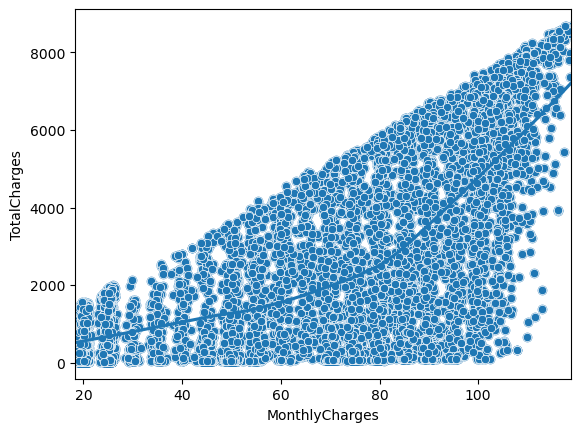

In [32]:
import seaborn as sns
sns.regplot(data=df, x="MonthlyCharges", y="TotalCharges", lowess=True)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges");

In [33]:
import numpy as np
import scipy as sp
np.round(sp.stats.pearsonr(df["MonthlyCharges"], df["TotalCharges"])[0],2)

0.65

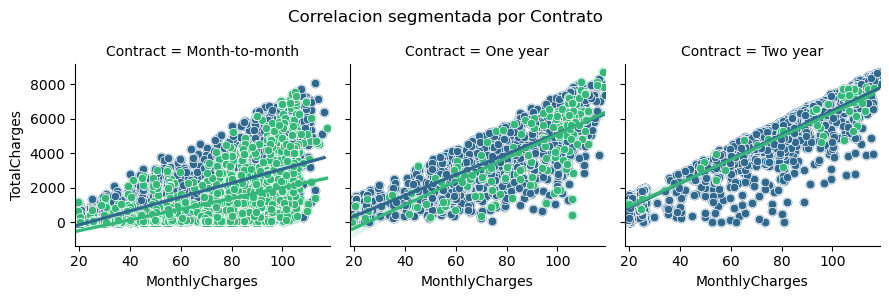

In [34]:
grid = sns.FacetGrid(df, col='Contract',hue="Churn",palette="viridis",legend_out=False)
grid.map(sns.regplot,'MonthlyCharges','TotalCharges')
grid.map(sns.scatterplot,'MonthlyCharges','TotalCharges')
plt.subplots_adjust(top=0.8)
grid.fig.suptitle('Correlacion segmentada por Contrato')
plt.show()

- Con el analisis de correlacion, vemos que efectivamente estas dos variables estan relacionadas. Vamos a obviar MonthlyCharges.

- Vemos un ligero sesgo de la variable TotalCharges pero vamos a discretizar esta variable.

### Discretizamos Tenure y TotalCharges

De esta manera podemos hacer un mejor analisis..

In [35]:
# Hacemos una copia de la lista de variables numericas..
ls=ls_num.copy()
ls.remove("Churn")
ls.remove("customerID")
ls

['tenure', 'MonthlyCharges', 'TotalCharges']

In [36]:
# Primero revisamos los percentiles

[print(df[var].quantile([0,0.25,0.5,0.75,1]),"\n\n") for var in ls]


0.00     0.0
0.25     9.0
0.50    29.0
0.75    55.0
1.00    72.0
Name: tenure, dtype: float64 


0.00     18.25
0.25     35.50
0.50     70.35
0.75     89.85
1.00    118.75
Name: MonthlyCharges, dtype: float64 


0.00      18.80
0.25     398.55
0.50    1394.55
0.75    3786.60
1.00    8684.80
Name: TotalCharges, dtype: float64 




[None, None, None]

In [37]:
df["TotalCharges_disc"]=pd.qcut(df["TotalCharges"],[0,0.25,0.5,0.75,1])
df["TotalCharges_disc"]=df["TotalCharges_disc"].astype("category")

df["tenure_disc"]=pd.qcut(df["tenure"],[0,0.25,0.5,0.75,1])
df["tenure_disc"]=df["tenure_disc"].astype("category")

print(df["TotalCharges_disc"].value_counts(),"\n\n")
print(df["tenure_disc"].value_counts())

(18.799, 398.55]     1762
(3786.6, 8684.8]     1761
(398.55, 1394.55]    1760
(1394.55, 3786.6]    1760
Name: TotalCharges_disc, dtype: int64 


(-0.001, 9.0]    1854
(55.0, 72.0]     1755
(29.0, 55.0]     1719
(9.0, 29.0]      1715
Name: tenure_disc, dtype: int64


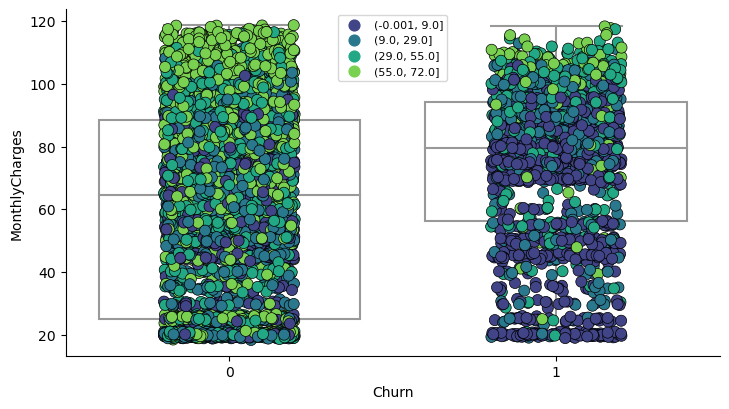

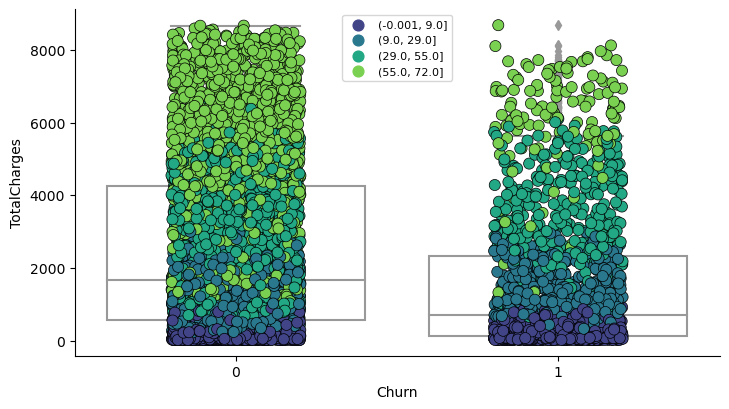

In [38]:
# Luego graficamos respecto de tenure..

for var in ls:
    if var!="tenure":
        # make boxplot with Catplot
        sns.catplot(x="Churn", y=var, data=df, kind="box", height=4, aspect=1.8, color="white")
        # add data points to boxplot with stripplot
        sns.stripplot(x="Churn", y=var, data=df,palette="viridis",
                      jitter=0.2,size=8, edgecolor="black",linewidth=0.5,hue="tenure_disc")
        plt.legend(loc="upper center",fontsize=8)
        plt.show()

## Analizamos informacion cruzada con las variables ya discretizadas

In [39]:
print(df.groupby(["gender","tenure_disc"])["gender"].agg("count"))

gender  tenure_disc  
Female  (-0.001, 9.0]    918
        (9.0, 29.0]      851
        (29.0, 55.0]     863
        (55.0, 72.0]     856
Male    (-0.001, 9.0]    936
        (9.0, 29.0]      864
        (29.0, 55.0]     856
        (55.0, 72.0]     899
Name: gender, dtype: int64


In [40]:
print(df.groupby(["tenure_disc","TotalCharges_disc"])["tenure_disc"].agg("count"))

tenure_disc    TotalCharges_disc
(-0.001, 9.0]  (18.799, 398.55]     1517
               (398.55, 1394.55]     337
               (1394.55, 3786.6]       0
               (3786.6, 8684.8]        0
(9.0, 29.0]    (18.799, 398.55]      245
               (398.55, 1394.55]     896
               (1394.55, 3786.6]     574
               (3786.6, 8684.8]        0
(29.0, 55.0]   (18.799, 398.55]        0
               (398.55, 1394.55]     389
               (1394.55, 3786.6]     832
               (3786.6, 8684.8]      498
(55.0, 72.0]   (18.799, 398.55]        0
               (398.55, 1394.55]     138
               (1394.55, 3786.6]     354
               (3786.6, 8684.8]     1263
Name: tenure_disc, dtype: int64


<Figure size 600x600 with 0 Axes>

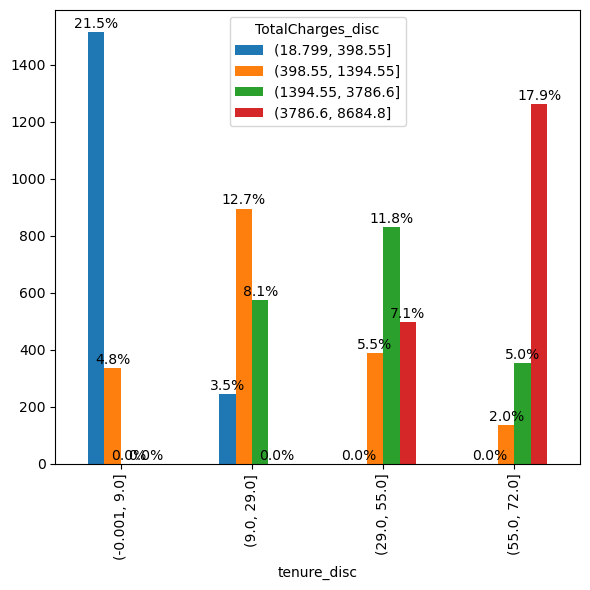

In [41]:
# Revisamos graficamente Tenure discretizada vs TotalCharges discretizada. Nos arroja buena informacion respecto
# del gasto de los clientes en la diferentes franjas de permanencia..

plt.figure(figsize=(6,6))
ax=pd.crosstab(df["tenure_disc"],df["TotalCharges_disc"]).plot.bar(figsize=(6,6));

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout();
plt.show();

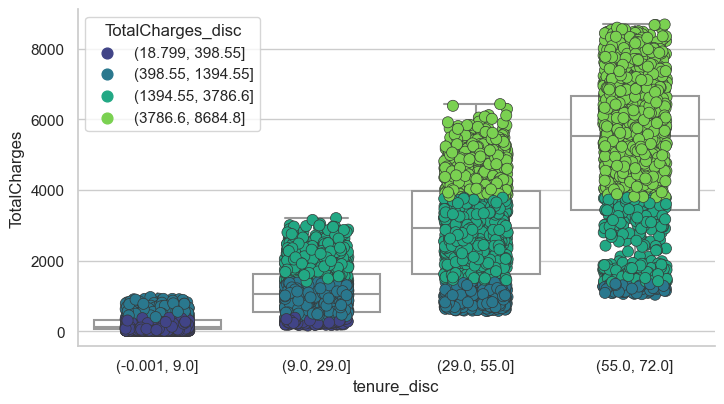

In [42]:
# Un grafico mas visual..

sns.set(style = 'whitegrid')

sns.catplot(x="tenure_disc", y="TotalCharges", data=df, kind="box", height=4, aspect=1.8,color="white")

sns.stripplot(x="tenure_disc", y="TotalCharges", 
              hue="TotalCharges_disc", data=df,jitter=0.2,
              palette="viridis", linewidth=0.5,size=8)
plt.show()

## Analisis de Paretto de Churn

Vamos a realizar un analisis de paretto para identificar que porcentaje acumulado de la tasa de abandono corresponde a cada segmento de tenure y en consecuencia, analizar que porcentaje de la target Churn explica tenure..

In [43]:
paretto=df[df["Churn"]==1].groupby("tenure_disc")[["Churn"]].agg("count")
paretto["Acum"]=paretto["Churn"].cumsum()
paretto["Perc"]=np.round(100*paretto["Acum"]/df.loc[df["Churn"]==1].shape[0],2)
paretto

,Churn,Acum,Perc
tenure_disc,,,
"(-0.001, 9.0]",923,923,49.38
"(9.0, 29.0]",486,1409,75.39
"(29.0, 55.0]",324,1733,92.72
"(55.0, 72.0]",136,1869,100.00


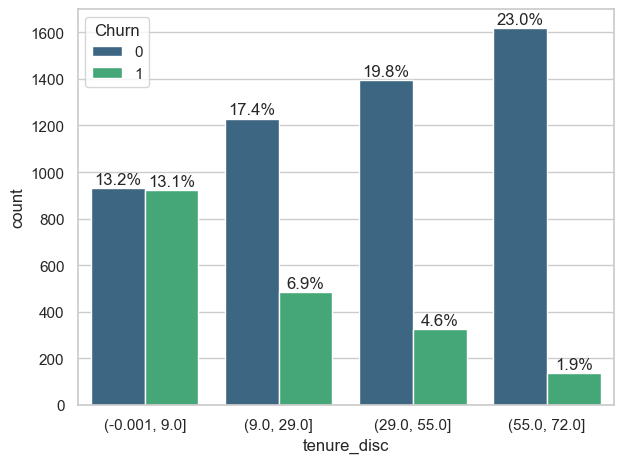

In [44]:
ax = sns.countplot(data=df, x="tenure_disc",hue="Churn",palette="viridis")
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Se observa una clara relacion lineal inversa entre tenure y Churn. Podriamos ampliar los cortes y volver a discretizar para un mejor analisis aun. 

In [45]:
p_target= np.round(df.loc[df["Churn"]==1].shape[0]/len(df),2)
print("Tasa de abandono real: " , p_target*100,"%")

Tasa de abandono real:  27.0 %


C:\Users\prose\miniconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


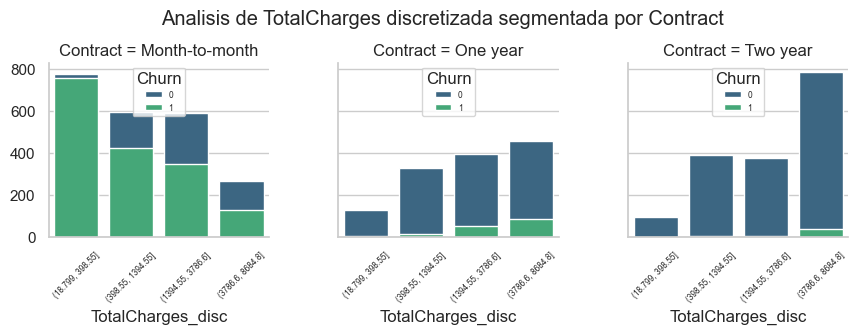

In [46]:

grid = sns.FacetGrid(data=df, col='Contract',hue="Churn",palette="viridis",legend_out=False)
grid.map(sns.countplot,'TotalCharges_disc')

for axis in grid.axes.flat:
    axis.tick_params(axis="x", labelsize=6, labelrotation=45)
    axis.legend(title="Churn",loc="upper center",fontsize=6)
    
plt.subplots_adjust(top=0.8)
grid.fig.suptitle('Analisis de TotalCharges discretizada segmentada por Contract')
plt.show();

## Servicio premium vs Servicio Basico

Aqui vamos a dividir las variables mas emparentadas a un servicio de tipo premium de las mas basicas. Concentramos el analisis solo en los clientes que abandonaron. Cruzaremos informacion y analizaremos..

In [47]:
# Identificamos variables de Servicio Premium
var_serv_premium=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]

# Identificamos variables de servicio Basico
var_serv_basico=["PhoneService","MultipleLines", "InternetService"]

# Importamos el paquete itertools
import itertools

# Copiamos la data
dat=df.copy()

# filtramos por la target
target="Churn"
dat=dat[dat[target]==1]

# Generamos todas las combinaciones de 2 servicios, con 1 servicio basico y 1 premium
servicios_combinados = itertools.product(var_serv_premium,var_serv_basico)

# Transformamos a lista para poder iterar
servicios_combinados=list(servicios_combinados)

print("El total de abandonos es:", dat.shape[0],", repartidos segun cada tabla de la siguiente manera:")
print("\n\n")
for comb in servicios_combinados:
    print(pd.crosstab(dat[comb[0]],dat[comb[1]],normalize="all", margins=True, margins_name="Total"))
    print("-------------------------------------")


El total de abandonos es: 1869 , repartidos segun cada tabla de la siguiente manera:



PhoneService               No       Yes     Total
OnlineSecurity                                   
No                   0.075441  0.706260  0.781701
No internet service  0.000000  0.060460  0.060460
Yes                  0.015516  0.142322  0.157838
Total                0.090958  0.909042  1.000000
-------------------------------------
MultipleLines              No  No phone service       Yes     Total
OnlineSecurity                                                     
No                   0.333868          0.075441  0.372392  0.781701
No internet service  0.055110          0.000000  0.005350  0.060460
Yes                  0.065276          0.015516  0.077047  0.157838
Total                0.454254          0.090958  0.454789  1.000000
-------------------------------------
InternetService           DSL  Fiber optic       No     Total
OnlineSecurity                                               
No  

Graficamos informacion cruzada de cada servicio basico con cada servicio premium

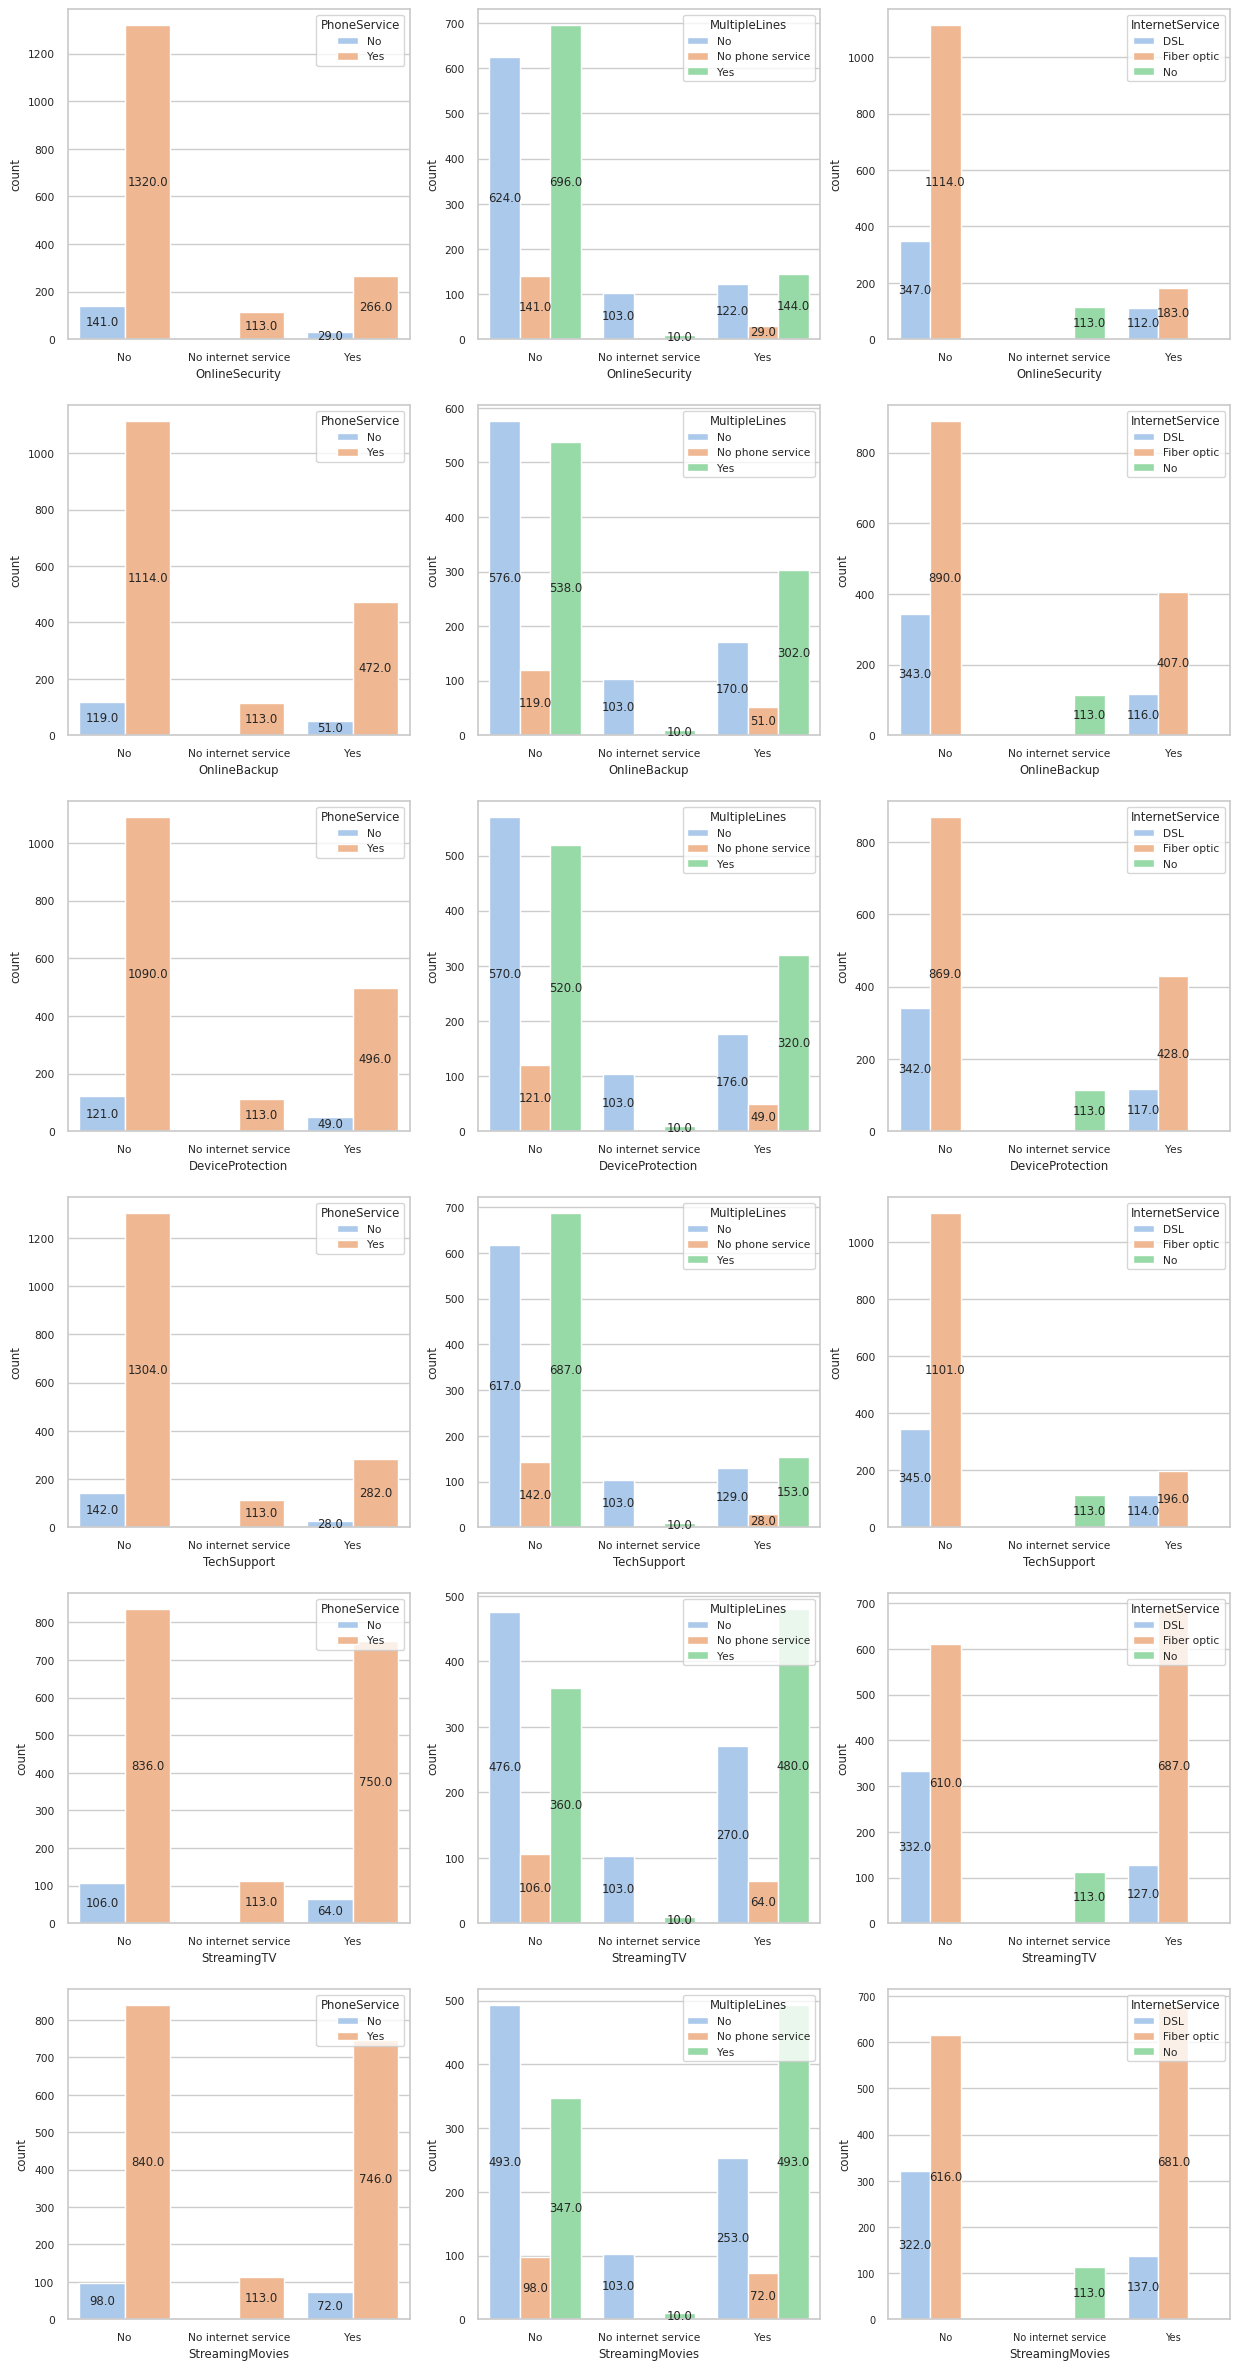

In [48]:
# Target..
target="Churn"

# Reseteamos los valores de seaborn
sns.reset_defaults()
sns.set(font_scale=0.7, style="whitegrid")

# Parametros de la grilla del grafico..
n_rows=len(var_serv_premium)
n_cols=len(var_serv_basico)

# Inicializamos la figura y los ejes..
f, ax=plt.subplots(nrows=n_rows,ncols=n_cols,figsize = (15,30))

# Contador del numero de grafico
i=0

# Graficamos..

for row in range(0,n_rows,1):
    plt.tick_params(labelsize=7)
    for col in range(0,n_cols,1):
        bx = sns.countplot(ax=ax[row,col],
                      data=df[df["Churn"]==1], 
                      x=var_serv_premium[i],
                      hue=var_serv_basico[col],
                      palette="pastel")
        for p in bx.patches:
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            bx.annotate(y, (x, y/2), ha='center', va='center')
    i+=1

sns.reset_defaults()

### Tablas Dinamicas

In [140]:
# Vamos a realizar una funcion para poder cruzar informacion de servicio basico vs full a traves de una tabla dinamica

def df_pivot(df,var_index, var_column,label_analisis,total_df):
    
    
    df=df.copy()
    df=df[df["Churn"]==1]

    df=df.pivot_table(index=var_index,
                      columns=var_column,
                      values="Churn",
                      aggfunc="count")
    
    # Resetamos el index
    df.reset_index(drop=False,inplace=True)
    
    # Transformamos a dataframe y resetamos el index nuevamente 
    df=pd.DataFrame(df.T)
    df.reset_index(drop=False,inplace=True)
    
    # Eliminamos la primer fila
    df=df.drop(index=df.index[0])

    return(df)  

In [141]:
# definimos variable de analisis y argumentos de la funcion
label_analisis="Yes"
total_df=df[df["Churn"]==1].shape[0]

In [142]:
# Llamamos a la funcion
df_ps=df_pivot(df,"PhoneService",var_serv_premium,label_analisis,total_df)

# Agregamos columna de porcentaje y ordenamos
df_ps["porc%"]=df_ps[1]/total_df*100
df_ps.sort_values(1,ascending=False,inplace=True)

# Renombramos columnas
dict_labels={0:"No", 1:"Yes"}
df_ps.rename(columns=dict_labels,inplace=True)

# Desplegamos..
df_ps.head(5)


,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,No,Yes,porc%
1,No,No,No,No,No,No,35,327,17.495987
9,No,No,No,No,Yes,Yes,10,121,6.47405
365,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,113,6.046014
3,No,No,No,No,No,Yes,13,107,5.724987
7,No,No,No,No,Yes,No,7,98,5.243446


In [143]:
print("El total de abandonos que tenian servicio basico de linea es: ",
      df_ps[label_analisis].sum(axis=0),"(",
      np.round(df_ps[label_analisis].sum(axis=0)/total_df*100,2),")%")

El total de abandonos que tenian servicio basico de linea es:  1699 ( 90.9 )%


### Inspeccion PhoneService
- Como era de esperarse una gran cantidad de los clientes que abandonaron tenia el servicio de linea (90.9%)
- Existe un porcentaje alto (17,49%) poseedor del servicio basico de linea, que explica el abandono, al cual no le interesaban en absoluto los servicios premium o no podian pagarlo:
    - Puede haber una falencia en el servicio basico de linea, por ej relacion precio calidad.
    - Puede que haya que revisar los costos de los servicios premium.

In [144]:
# Llamamos a la funcion
df_ml=df_pivot(df,"MultipleLines",var_serv_premium,label_analisis,total_df)

# Agregamos columna de porcentaje y ordenamos
df_ml["porc%"]=df_ml[2]/total_df*100
df_ml.sort_values(2,ascending=False,inplace=True)

# Renombramos columnas
dict_labels={0:"No", 1:"No phone service", 2:"Yes"}
df_ml.rename(columns=dict_labels,inplace=True)

# Desplegamos..
df_ml.head(5)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,No,No phone service,Yes,porc%
1,No,No,No,No,No,No,208,35,119,6.367041
9,No,No,No,No,Yes,Yes,46,10,75,4.012841
225,No,Yes,Yes,No,Yes,Yes,10,5,62,3.317282
63,No,No,Yes,No,Yes,Yes,27,9,60,3.210273
3,No,No,No,No,No,Yes,48,13,59,3.156768


In [145]:
print("El total de abandonos que tenian servicio de MultipleLines es: ",
      df_ml[label_analisis].sum(axis=0),"(",
      np.round(df_ml[label_analisis].sum(axis=0)/total_df*100,2),")%")

El total de abandonos que tenian servicio de MultipleLines es:  850 ( 45.48 )%


### Inspeccion MultipleLines

- A diferencia de PhoneService, solo la mitad de los clientes que abandonaron tenian lineas multiples:
    - Quizas es servicio bonificado
- A diferencia de lo que ocurre con el servicio basico de linea, los que tenian lineas multiples estan bastante repartidos entre los que tenian las distintas combinaciones de servicio premium, no superando el 6.36% de la target. Podriamos decir que la variable MultipleLines es bastante debil a la hora de explicar el abandono.
- Al igual que con PhoneService, el mayor (Aunque muy bajo) porcentaje de penetracion en la target se corresponde con clientes que no tenian contratado ningun servicio premium o no podian pagarlo.
- Podriamos decir que este servicio basico no es un buen indicador del abandono.

In [150]:
label_analisis="Fiber optic"

# Llamamos a la funcion
df_internet=df_pivot(df,"InternetService",var_serv_premium,label_analisis,total_df)

# Agregamos columna de porcentaje y ordenamos
df_internet["porc%"]=df_internet[1]/total_df*100
df_internet.sort_values(1,ascending=False,inplace=True)

# Renombramos columnas
dict_labels={0:"DSL", 1:"Fiber optic", 2:"No"}
df_internet.rename(columns=dict_labels,inplace=True)

# Desplegamos..
df_internet.head(5)

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DSL,Fiber optic,No,porc%
1,No,No,No,No,No,No,121,241,0,12.894596
9,No,No,No,No,Yes,Yes,15,116,0,6.206528
3,No,No,No,No,No,Yes,25,95,0,5.082932
7,No,No,No,No,Yes,No,18,87,0,4.654896
63,No,No,Yes,No,Yes,Yes,13,83,0,4.440877


In [151]:
print("El total de abandonos que tenian servicio de Fibra Optica es: ",
      df_internet[label_analisis].sum(axis=0),"(",
      np.round(df_internet[label_analisis].sum(axis=0)/total_df*100,2),")%")

El total de abandonos que tenian servicio de Fibra Optica es:  1297 ( 69.4 )%


### Inspeccion InternetService

- El servicio de Fibra optica, podria decirse que en realidad es premium pero a los fines del analisis me ha quedado mas comodo ponerlo como basico.
- vemos que el poder explicativo de la target es muy alto. Casi el 70% de los clientes que abandonaron, tenian este servicio contratado:
    - Seguramente hay una falencia en este servicio: calidad, precio, relacion de ambos por ej.

## Conclusiones
    

- La penetracion de la target Churn, es del 27% (tasa de abandono).
- Hombres y mujeres tienen una tasa de abandono muy similar.
- Variables muy explicativas: Las variables que mejor explican esta tasa (en principio, vamos a chequear con machine learning) son:
    - Tenure (En especial, los segmentos de menos de 29 meses con 75.39%),
    - InternetService (En especial, el servicio de Fibra Optica con 69.40%),
    - Contract (En especial, los contratos de mes a mes con 55.01%).

- Como era de esperarse una gran cantidad de los clientes que abandonaron tenia el servicio de linea (90.9%)
    - Existe un porcentaje alto (17,49%) poseedor del servicio basico de linea, que explica el abandono, al cual no le interesaban en absoluto los servicios premium o no podian pagarlo:
        - Puede haber una falencia en el servicio basico de linea, por ej relacion precio calidad.
        - Puede que haya que revisar los costos de los servicios premium. 

- A diferencia de PhoneService, solo la mitad de los clientes que abandonaron tenian lineas multiples:
    - Quizas es servicio bonificado
    - A diferencia de lo que ocurre con el servicio basico de linea, los que tenian lineas multiples,estan bastante repartidos entre los que tenian las distintas combinaciones de servicio premium, no superando el 6.36% de la target. Podriamos decir que la variable MultipleLines es bastante debil a la hora de explicar el abandono.
    - Al igual que con PhoneService, el mayor (Aunque muy bajo) porcentaje de penetracion en la target se corresponde con clientes que no tenian contratado ningun servicio premium o no podian pagarlo.
    - Podriamos decir que este servicio basico no es un buen indicador del abandono.

- El servicio de Fibra optica, podria decirse que en realidad es premium pero a los fines del analisis me ha quedado mas comodo ponerlo como basico.
- vemos que el poder explicativo de la target es muy alto. El 69.40% de los clientes que abandonaron, tenian este servicio contratado:
    - Seguramente hay una falencia en este servicio: calidad, precio, relacion de ambos por ej.
    
- Otras Conclusiones
    - En general, los clientes de servicio basico han preferido servicios de streaming por sobre los demas servicios premium.
    - Dependents, Las personas que tienen familiares a cargo, tienen una tasa mas baja de abandono que aquellos que no tienen familiares a cargo.
    - Los solteros tienen una tasa de abandono mas alta que las parejas.
    - Los clientes adheridos a factura electronica tiene una tasa de abandono mas alta que los demas.
    - El dataset adolece de una variable para la edad del cliente que estimo seria muy explicativa